This script generates a *gaussian noise* on H,S and V components of an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import pandas as pd
from scipy.stats import norm

In [2]:
bgr = cv2.imread("stars_in.png")

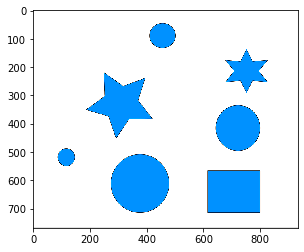

In [3]:
plt.imshow(bgr)

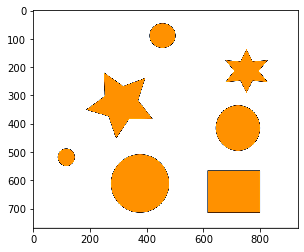

In [4]:
plt.imshow(imutils.opencv2matplotlib(bgr))

In [5]:
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

In [6]:
def plot_hists(hsv):
    plt.hist(hsv[:,:,0].flatten(), color="r", bins=30);#, label="H");
    plt.hist(hsv[:,:,1].flatten(), color="g", bins=30);#, label="S");
    plt.hist(hsv[:,:,2].flatten(), color="b", bins=30);#, label="V");
    plt.legend(("H","S", "V"), loc="upper right")

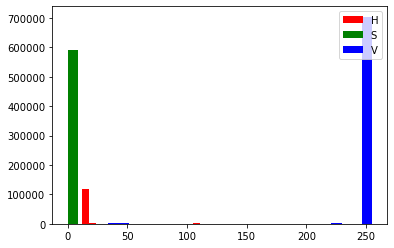

In [7]:
plot_hists(hsv)

In [8]:
pd.Series(hsv[:,:,0].flatten()).value_counts()

0      591446
17     115104
107      1456
18       1433
20       1105
        ...  
133         1
156         1
158         1
165         1
97          1
Length: 72, dtype: int64

In [9]:
hsv.shape

(768, 934, 3)

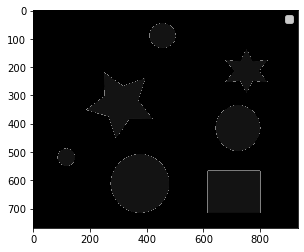

In [10]:
plt.imshow(hsv[:,:,0], cmap="Greys_r", vmin=0, vmax=255)
plt.legend("H")

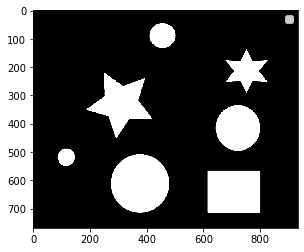

In [11]:
plt.imshow(hsv[:,:,1], cmap="Greys_r", vmin=0, vmax=255)
plt.legend("S")

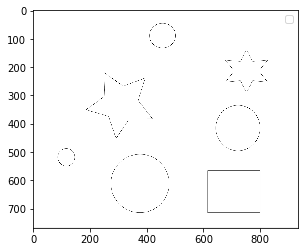

In [12]:
plt.imshow(hsv[:,:,2], cmap="Greys_r", vmin=0, vmax=255)
plt.legend("V")

(array([1868.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         932.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

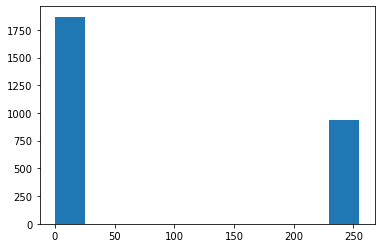

In [13]:
plt.hist(hsv[2].flatten())

In [14]:
saida = np.ones(hsv.shape, dtype=np.uint8)

In [15]:
hsv.shape

(768, 934, 3)

In [16]:
n_h = norm(loc=20, scale=15)
n_s = norm(loc=230, scale=12)
n_v = norm(loc=230, scale=20)

In [17]:
for i in range(hsv.shape[0]):
    for j in range(hsv.shape[1]):
        if hsv[i][j][0]==17: # se for um pixel originalmente laranja
            saida[i][j][0] = np.clip(n_h.rvs(),3,255)
            saida[i][j][1] = np.clip(n_s.rvs(),3,255)
            saida[i][j][2] = np.clip(n_v.rvs(),3,255)
        else:
            saida[i,j,:]=[100, 240,240]

Ajustes

$H \sim N(30, 8)$

$S \sim N(200,15)$

$V \sim N(200, 10)$

In [23]:
saida_bgr = cv2.cvtColor(saida, cv2.COLOR_HSV2BGR)
saida_rgb = cv2.cvtColor(saida, cv2.COLOR_HSV2RGB)


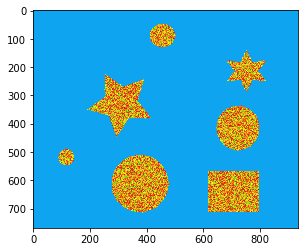

In [24]:
plt.imshow(saida_rgb)

In [25]:
cv2.imwrite("stars_output_4.png", saida_bgr)

True

In [26]:
! open stars_output_4.png

In [27]:
!mv stars_output_4.png stars.png

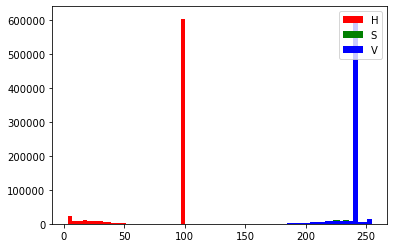

In [22]:
plot_hists(saida)